# 🏨 Hotel Booking Cancellation Analysis

This project focuses on analyzing hotel booking data to understand the patterns and reasons behind booking cancellations. Cancellations can cause significant revenue loss and operational challenges for hotels, so gaining insights from data can help businesses improve customer retention and optimize booking strategies.

Using **Python**, along with libraries like **Pandas** for data manipulation, **Matplotlib** and **Seaborn** for visualization, this analysis explores:
- The overall cancellation rate
- Trends in booking prices (ADR) over time
- Market segments with high cancellation rates
- Country-wise cancellation patterns
- Comparisons between resort and city hotels

The goal is to extract meaningful insights that can help stakeholders make informed decisions to reduce cancellation rates and improve revenue management.


# Importing Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading The Dataset

In [4]:
df = pd.read_csv('hotel_booking.csv')

# Exploratory Data Analysis and Data Cleaning

In [6]:
# Displays the first 5 rows of the DataFrame to quickly inspect the data

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [7]:
# Displays the last 5 rows of the DataFrame to examine the ending portion of the data

df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [8]:
 # Shows how many rows and columns are in the data

df.shape

(119390, 36)

In [9]:
# Shows the names of all the columns in the data

df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [10]:
# Provides a summary of the DataFrame including column names, non-null counts, and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
# Converts the 'reservation_status_date' column to datetime format for time-based analysis

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [12]:
# Provides a summary of the DataFrame including column names, non-null counts, and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [13]:
# Generates summary statistics (like count, unique, top, freq) for all categorical (object-type) columns

df.describe(include = object)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [14]:
for col in df.describe(include='object').columns:  # Loop through each text column in the DataFrame
   
    print(col)                                     # Print the column name
    
    print(df[col].unique())                        # Print all the unique values in that column
    
    print('-'*50)                                  # Print a separator line for better readability


hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [15]:
# Counts the total number of missing (null) values in each column of the DataFrame

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [16]:
# Removes the 'agent' and 'company' columns from the DataFrame

df.drop(['agent' , 'company'], axis = 1 , inplace = True)  

# Removes all rows that have missing (null) values

df.dropna(inplace = True)    

In [17]:
# Generates summary statistics for all numerical columns (like mean, min, max, etc.)

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


<Axes: >

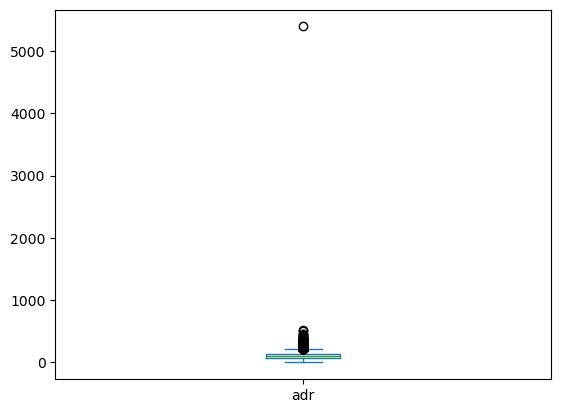

In [18]:
# Creates a box plot for the 'adr' column to visualize its distribution and outliers

df['adr'].plot(kind = 'box')

In [19]:
# Filters the DataFrame to only include rows where 'adr' is less than 5000

df = df[df['adr'] < 5000]

In [20]:
# Generates summary statistics for all numerical columns (like mean, min, max, etc.)

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


# Data Analysis and Visualizations

In [22]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)   # Finds the percentage of bookings that were canceled or not canceled

cancelled_perc     # Shows the result

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64

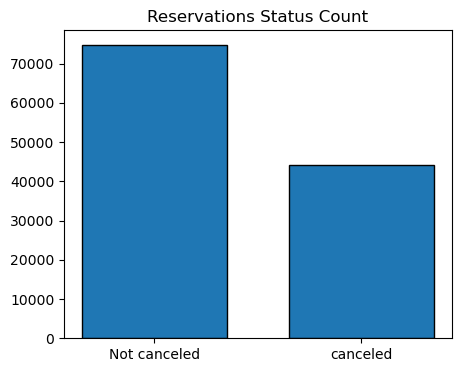

In [23]:
plt.figure(figsize=(5, 4))  # Sets the size of the chart (width=5, height=4)

plt.title('Reservations Status Count')  # Adds a title to the chart

plt.bar(['Not canceled', 'canceled'], df['is_canceled'].value_counts(), edgecolor='k', width=0.7)  # Creates a bar chart showing the number of canceled and not canceled bookings

plt.show()  # Displays the chart

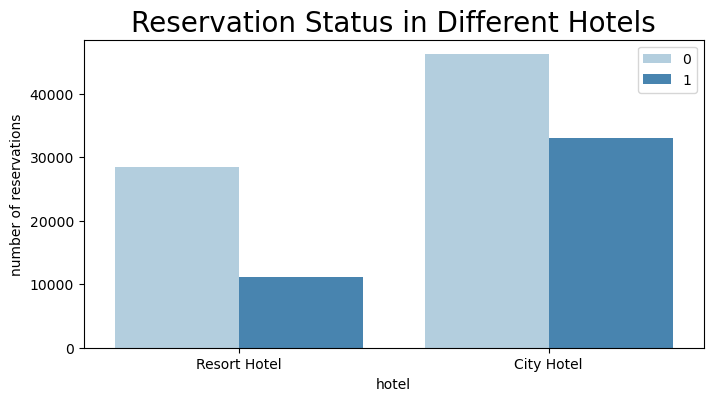

In [24]:
plt.figure(figsize=(8, 4))  # Sets the size of the chart (width=8, height=4)

ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues')  # Creates a bar chart showing canceled and not canceled bookings for each hotel type

ax1.legend(bbox_to_anchor=(1, 1))  # Moves the legend to the top-right corner

plt.title('Reservation Status in Different Hotels', size=20)  # Adds a big title to the chart

plt.xlabel('hotel')  # Adds a label to the x-axis

plt.ylabel('number of reservations')  # Adds a label to the y-axis

plt.show()  # Displays the chart


In [25]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']  # Filters the DataFrame to include only rows where the hotel type is 'Resort Hotel'

resort_hotel['is_canceled'].value_counts(normalize=True)  # Calculates the percentage of canceled and not canceled bookings for Resort Hotel

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [26]:
city_hotel = df[df['hotel'] == 'City Hotel']   # Filters the DataFrame to include only rows where the hotel type is 'City Hotel'

city_hotel['is_canceled'].value_counts(normalize = True)   # Calculates the percentage of canceled and not canceled bookings for City Hotel

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [27]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()  # Groups Resort Hotel data by date and calculates the average daily rate (adr) for each day

city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()  # Groups City Hotel data by date and calculates the average daily rate (adr) for each day

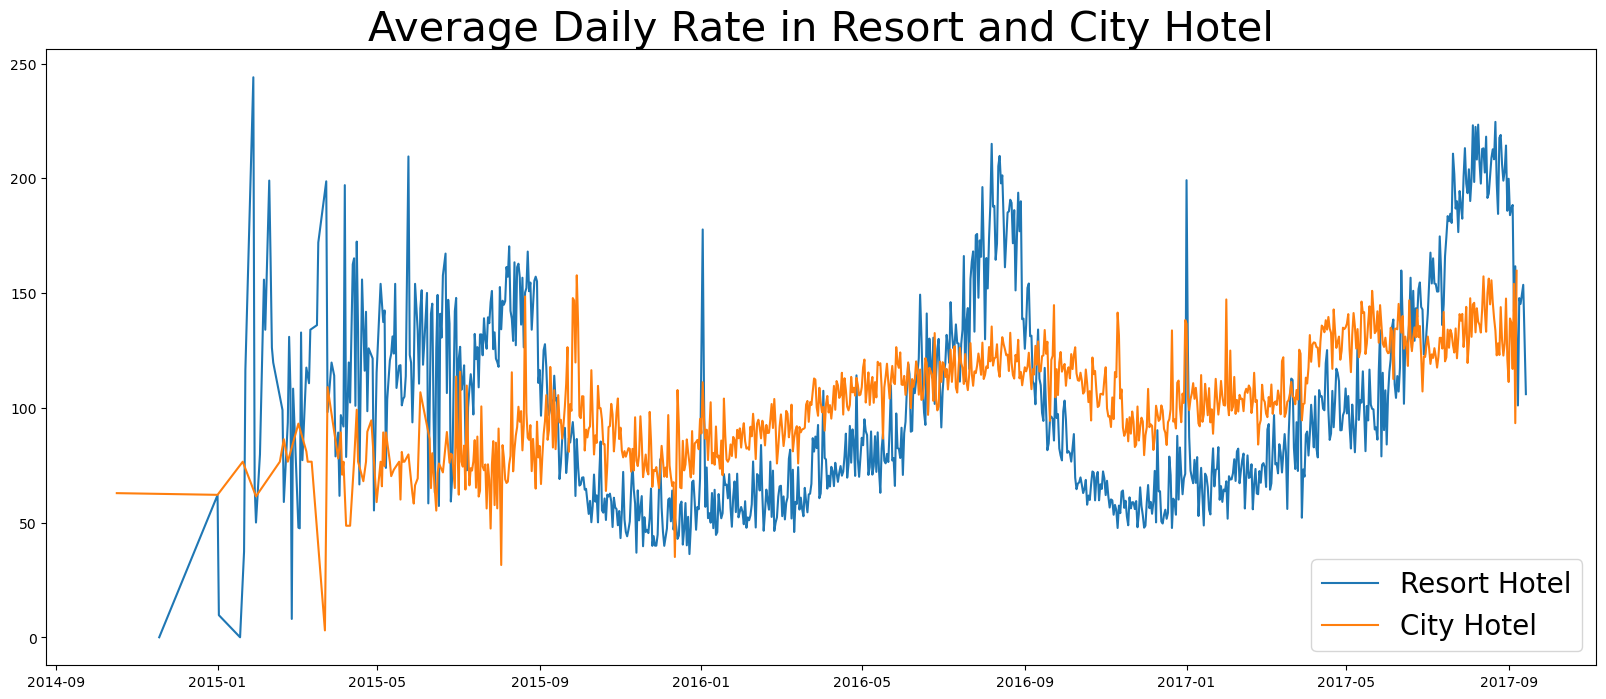

In [28]:
plt.figure(figsize=(20, 8))  # Sets the size of the chart (very wide for better visibility)

plt.title('Average Daily Rate in Resort and City Hotel', fontsize=30)  # Adds a big title to the chart

plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel')  # Plots the average daily rate (adr) over time for Resort Hotel
plt.plot(city_hotel.index, city_hotel['adr'], label='City Hotel')  # Plots the average daily rate (adr) over time for City Hotel

plt.legend(fontsize=20)  # Shows labels for both lines with larger font
plt.show()  # Displays the chart


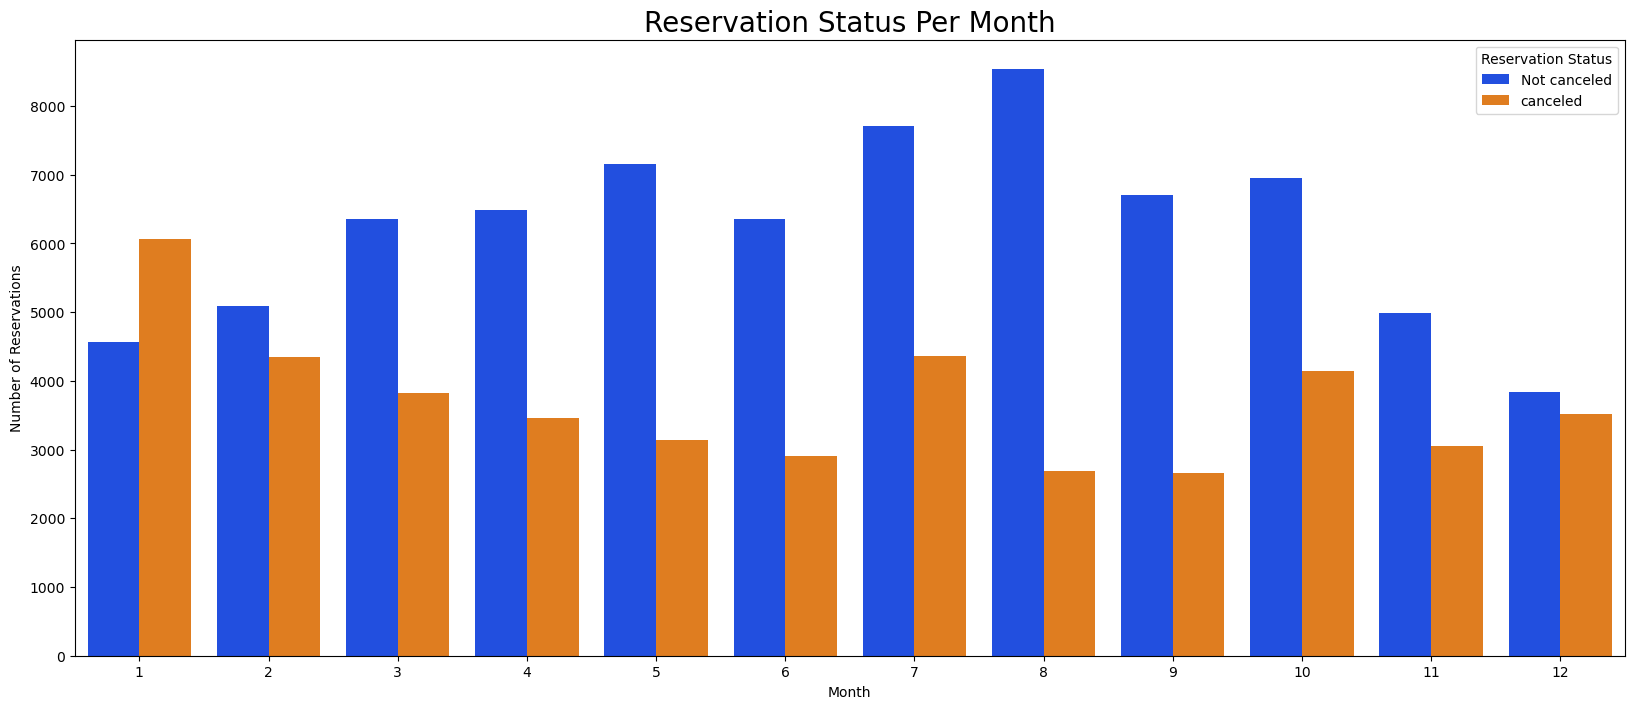

In [29]:
# Extract the month from the reservation_status_date column
df['month'] = df['reservation_status_date'].dt.month


# Set figure size
plt.figure(figsize=(20, 8))

# Create count plot
ax1 = sns.countplot(x = 'month' , hue = 'is_canceled' , data = df , palette = 'bright')

# Get legend handles and labels
handles, labels = ax1.get_legend_handles_labels()

# Set legend with custom labels and position
ax1.legend(handles , ['Not canceled', 'canceled'], title = 'Reservation Status' , bbox_to_anchor=(1,1))

# Set title and labels
plt.title('Reservation Status Per Month' , fontsize = 20)
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.show()


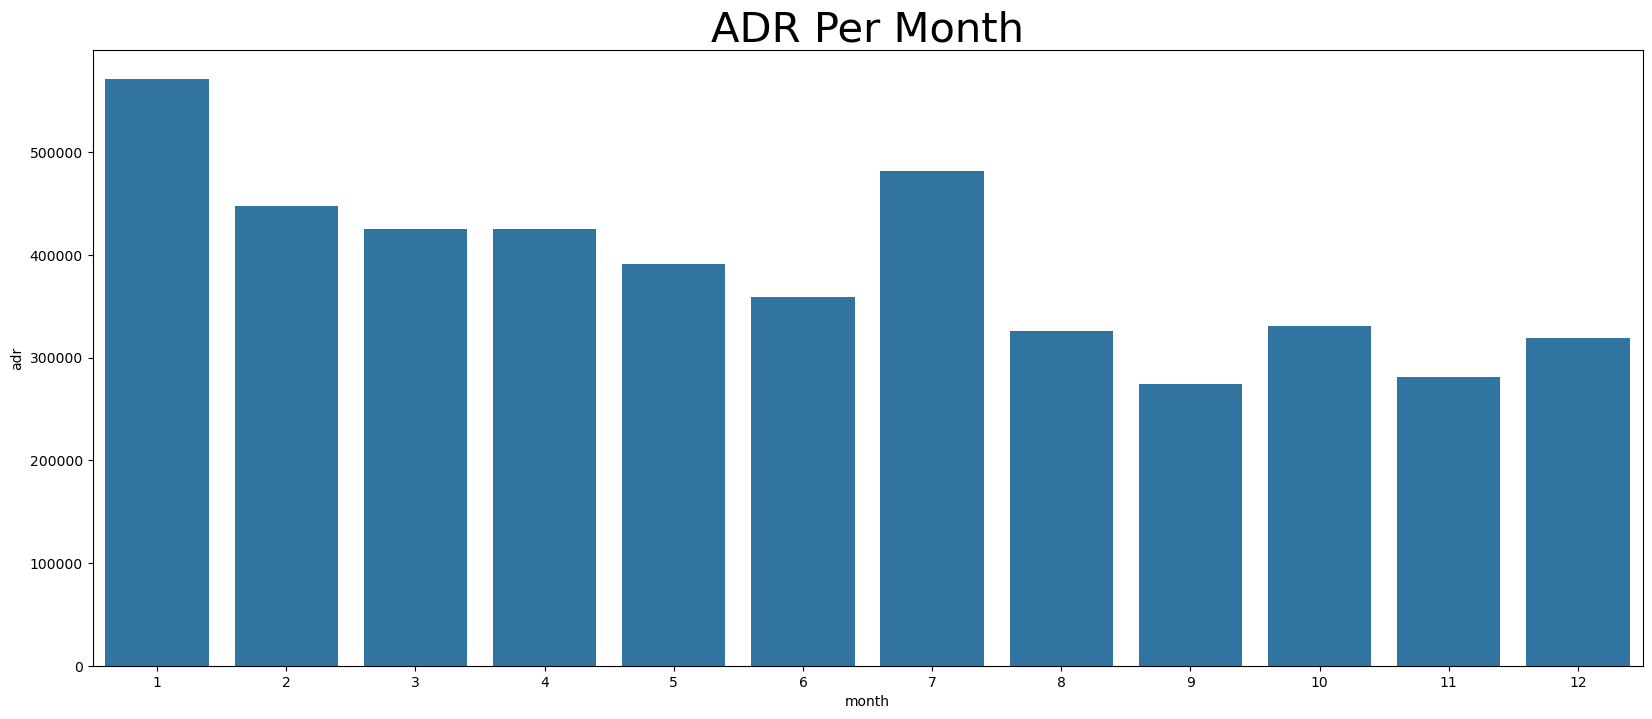

In [30]:
plt.figure(figsize=(20, 8))  # Sets the size of the chart (wide and tall for clear viewing)
plt.title('ADR Per Month', fontsize=30)  # Adds a big title to the chart

# Creates a bar chart showing total ADR (average daily rate) for canceled bookings in each month
sns.barplot(
    x='month',
    y='adr',
    data=df[df['is_canceled'] == 1].groupby('month', as_index=False)['adr'].sum()
)

plt.show()  # Displays the chart


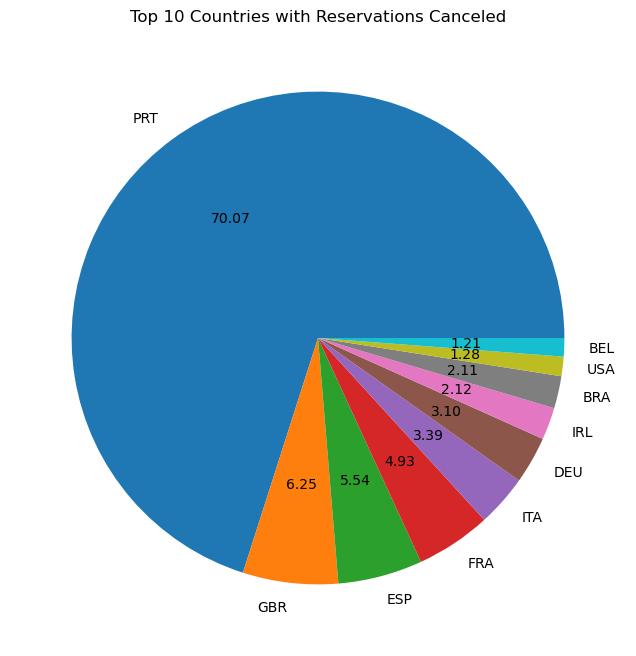

In [31]:
canceled_data = df[df['is_canceled'] == 1]  # Filters the data to include only canceled bookings

Top_10_Countries = canceled_data['country'].value_counts()[:10]  # Finds the top 10 countries with the most canceled bookings

plt.figure(figsize=(8, 8))  # Sets the size of the pie chart
plt.title('Top 10 Countries with Reservations Canceled')  # Adds a title to the chart

# Creates a pie chart showing the percentage of canceled bookings from the top 10 countries
plt.pie(Top_10_Countries, autopct='%.2f', labels=Top_10_Countries.index)

plt.show()  # Displays the pie chart


In [32]:
df['market_segment'].value_counts()  # Counts how many bookings came from each market segment (like Online TA, Direct, Corporate, etc.)


market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [33]:
df['market_segment'].value_counts(normalize=True)  # Shows the percentage of total bookings from each market segment

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [34]:
canceled_data['market_segment'].value_counts(normalize=True)  # Shows the percentage of canceled bookings from each market segment

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

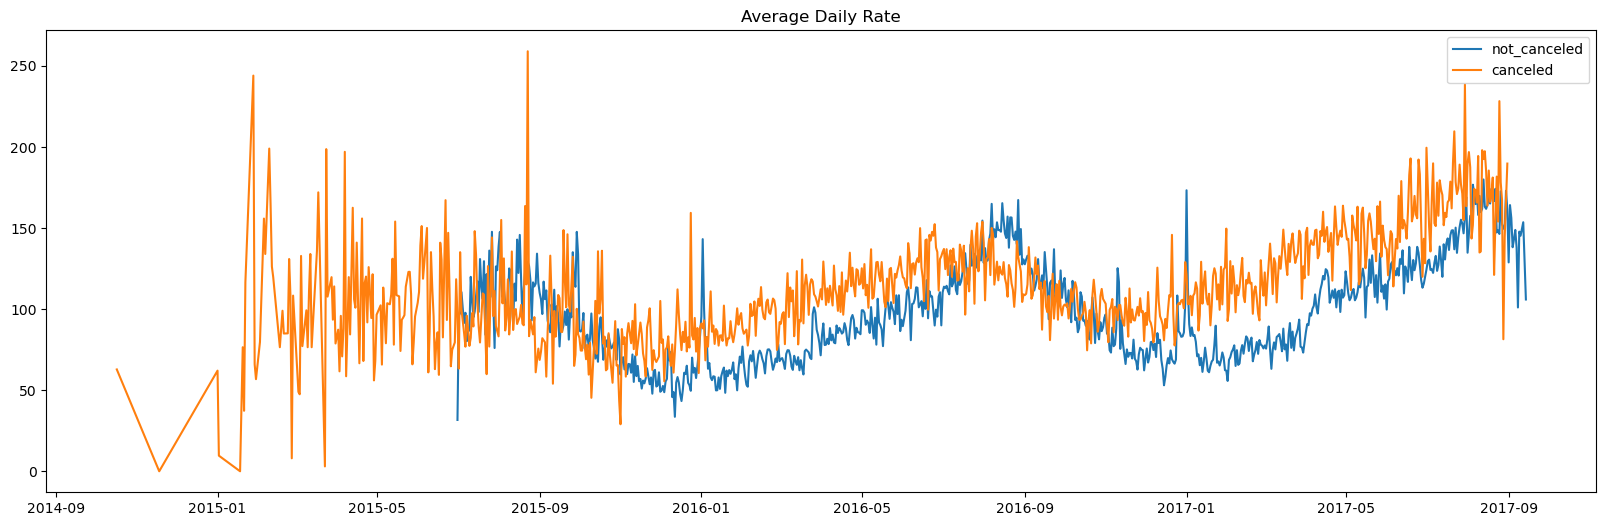

In [35]:
# Group canceled bookings by date and calculate the average daily rate (adr)
canceled_df_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean()

canceled_df_adr.reset_index(inplace=True)  # Reset the index to turn the date back into a column
canceled_df_adr.sort_values('reservation_status_date', inplace=True)  # Sort the data by date

# Filter the data for bookings that were not canceled
not_canceled_data = df[df['is_canceled'] == 0]

# Group non-canceled bookings by date and calculate the average adr
not_canceled_df_adr = not_canceled_data.groupby('reservation_status_date')[['adr']].mean()

not_canceled_df_adr.reset_index(inplace=True)  # Reset the index
not_canceled_df_adr.sort_values('reservation_status_date', inplace=True)  # Sort by date

# Plot the average daily rates for both canceled and non-canceled bookings

plt.figure(figsize=(20, 6))  # Set the size of the chart
plt.title('Average Daily Rate')  # Title of the chart
plt.plot(not_canceled_df_adr['reservation_status_date'], not_canceled_df_adr['adr'], label='not_canceled')  # Line for not canceled
plt.plot(canceled_df_adr['reservation_status_date'], canceled_df_adr['adr'], label='canceled')  # Line for canceled
plt.legend()  # Show labels for both lines


In [72]:
# Filter the data to include only records between 2016 and before September 2017

canceled_df_adr = canceled_df_adr[(canceled_df_adr['reservation_status_date'] > '2016') & 
                                   (canceled_df_adr['reservation_status_date'] < '2017-09')]

not_canceled_df_adr = not_canceled_df_adr[(not_canceled_df_adr['reservation_status_date'] > '2016') & 
                                           (not_canceled_df_adr['reservation_status_date'] < '2017-09')]


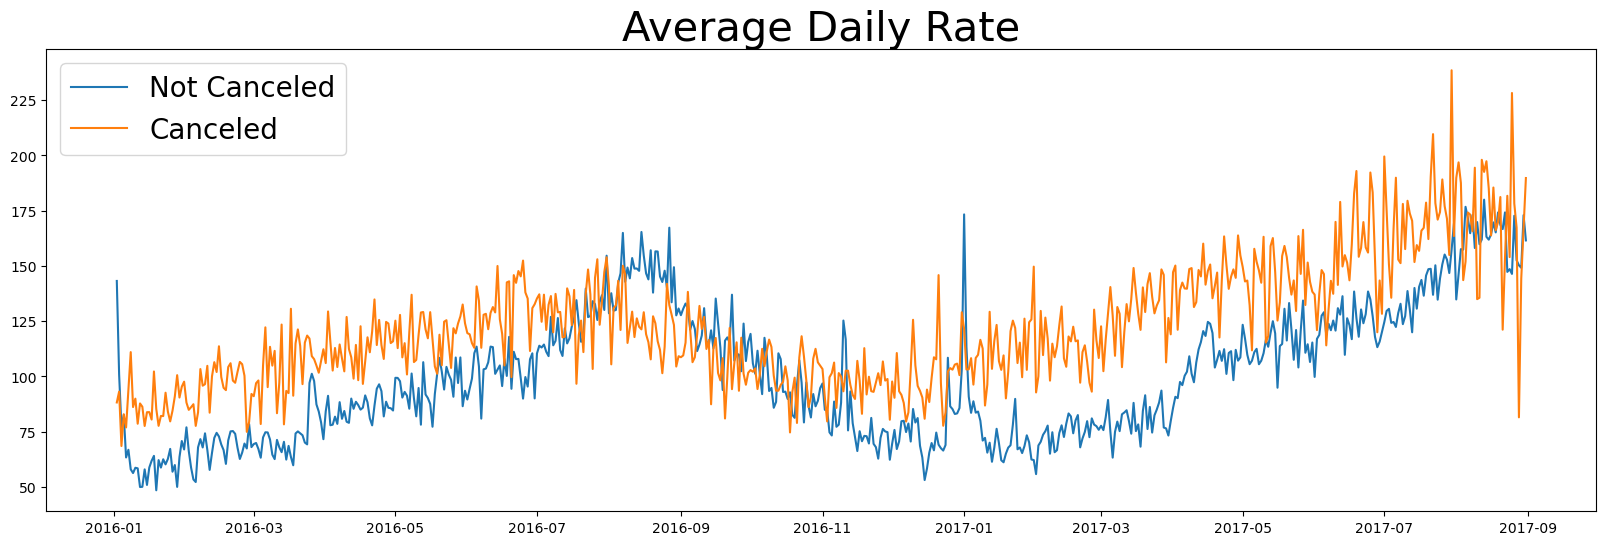

In [78]:
# Plotting the average daily rate (adr) for canceled and not canceled bookings over time
plt.figure(figsize=(20, 6))  # Set the size of the chart
plt.title('Average Daily Rate', fontsize=30)  # Add a large title

# Plot adr for not canceled bookings
plt.plot(not_canceled_df_adr['reservation_status_date'], not_canceled_df_adr['adr'], label='Not Canceled')

# Plot adr for canceled bookings
plt.plot(canceled_df_adr['reservation_status_date'], canceled_df_adr['adr'], label='Canceled')

plt.legend(fontsize=20)  # Show legend to label the lines
plt.show()  # Display the plot


# Project Summary

In this project, we performed an in-depth exploratory analysis of a hotel booking dataset using Python. Our goal was to understand the behavior behind booking cancellations and the factors that might influence them. We cleaned the data, handled missing values, removed outliers (especially in the adr column), and visualized trends over time.

We compared reservations across different hotel types (Resort vs. City), looked into reservation status trends, and examined customer segments and countries with higher cancellation rates.

# 🔍 Key Takeaways:
• Overall Cancellation Rate: A significant portion of bookings were canceled, especially in specific time periods.

• ADR Trends: Canceled bookings often had higher average daily rates (adr) than non-canceled ones, especially in peak months.

• Hotel Type Comparison: Resort hotels had higher cancellation rates than city hotels during certain months.

• Top Canceling Countries: A few countries accounted for most of the cancellations — this can help in targeting cancellation policies.

• Market Segments: The Online Travel Agents (OTA) segment had the highest percentage of cancellations, indicating possible overbooking or flexible       cancellation options.

• Monthly Trends: Cancellations were more frequent during the high-demand months, which may indicate price sensitivity or booking flexibility.

